# Introduction

Apprentissage polynomiale pour une fonction dùune variable réelle.

In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [10]:
from scipy.optimize import minimize

## Génération des données

In [2]:
def cible(x):
    return 1. / (1. + np.sqrt(x))

In [7]:
points = np.linspace(0, 1., 10)
valeurs = cible(points)
donnees = valeurs + 0.1 * np.random.randn(10)

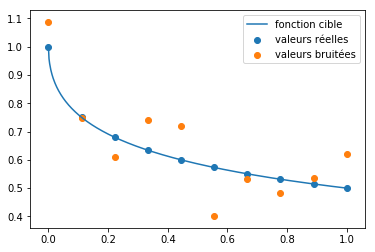

In [8]:
x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, label="fonction cible")
plt.scatter(points, valeurs, label="valeurs réelles")
plt.scatter(points, donnees, label="valeurs bruitées")
plt.legend()

## Phase d'apprentissage

In [17]:
def generation_polynome(params):
    def mon_polynome(point):
        poly_val = 0
        for k, a in enumerate(params):
            poly_val += a * point ** k
        return poly_val
    return mon_polynome

In [18]:
def erreur(params):
    resultat = 0
    mon_polynome = generation_polynome(params)
    for point, donnee in zip(points, donnees):
        resultat += (donnee - mon_polynome(point)) ** 2
    return resultat
            

In [19]:
param_opt = minimize(fun=erreur, x0=np.zeros(shape=(5,)))

In [12]:
param_opt

      fun: 0.061304227427766624
 hess_inv: array([[ 4.62426511e-01, -4.95225847e+00,  1.61091342e+01,
        -2.02458037e+01,  8.64130362e+00],
       [-4.95225847e+00,  1.13913578e+02, -4.81611001e+02,
         6.94835694e+02, -3.23316198e+02],
       [ 1.61091342e+01, -4.81611001e+02,  2.23125683e+03,
        -3.38997091e+03,  1.63151520e+03],
       [-2.02458037e+01,  6.94835694e+02, -3.38997091e+03,
         5.31678563e+03, -2.61571353e+03],
       [ 8.64130362e+00, -3.23316198e+02,  1.63151520e+03,
        -2.61571353e+03,  1.30745981e+03]])
      jac: array([ 1.27591193e-07, -7.25500286e-07, -1.08033419e-07,  3.40398401e-07,
        6.70552254e-07])
  message: 'Optimization terminated successfully.'
     nfev: 189
      nit: 19
     njev: 27
   status: 0
  success: True
        x: array([  1.05830355,  -3.44798215,  10.82117375, -15.30098079,
         7.51563928])

In [20]:
param_opt.x

array([  1.05830355,  -3.44798215,  10.82117375, -15.30098079,
         7.51563928])

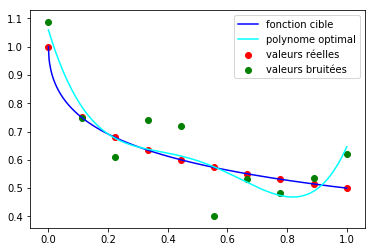

In [22]:
x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, color="blue", label="fonction cible")
plt.scatter(points, valeurs, color="red", label="valeurs réelles")
plt.scatter(points, donnees, color="green", label="valeurs bruitées")
poly_opt = generation_polynome(param_opt.x)
plt.plot(x, poly_opt(x), color="cyan", label="polynome optimal")
plt.legend()

## Exercice

1. Reprendre le code pour obtenir le graphique à partir de la taille de l'échantillon et le degrés du polynome.
2. Pour une taille d'échantillon donnée, étudier l'impact de la variation du degrés du polynome sur la valeur de la fonction d'erreur et sur l'erreur visuelle avec la fonction cible.

In [25]:
def cible(x):
    return 1. / (1. + np.sqrt(x))

def generation_echantillon(taille):
    points = np.linspace(0, 1., taille)
    valeurs = cible(points)
    donnees = valeurs + 0.1 * np.random.randn(taille)
    return points, valeurs, donnees

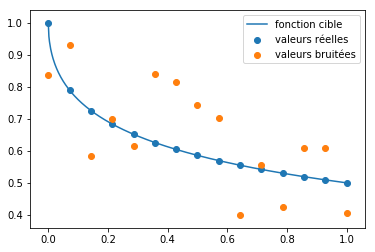

In [26]:
points, valeurs, donnees = generation_echantillon(15)

x = np.linspace(0, 1., 500)
y = cible(x)
plt.plot(x, y, label="fonction cible")
plt.scatter(points, valeurs, label="valeurs réelles")
plt.scatter(points, donnees, label="valeurs bruitées")
plt.legend()

### Utilisation de la POO pour simplifier l'utilisation

In [52]:
class Modele:
    def __init__(
        self, 
        fonction_cible, 
        taille_echantillon,
    ):
        self.cible = fonction_cible
        self.taille = taille_echantillon
        self.points = np.linspace(0, 1., self.taille)
        self.valeurs = cible(self.points)
        self.donnees = self.valeurs + 0.1 * np.random.randn(self.taille)
        
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.cible(x)
        repere.plot(x, y, label="fonction cible")
        repere.scatter(self.points, self.valeurs, label="valeurs réelles")
        repere.scatter(self.points, self.donnees, label="valeurs bruitées")
        

In [53]:
m = Modele(fonction_cible=cible, taille_echantillon=10)

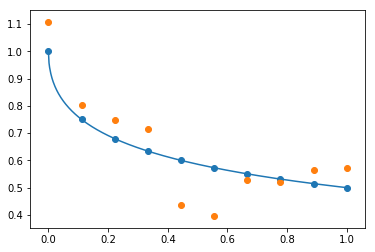

In [54]:
fig, rep = plt.subplots()
m.affichage(rep)

In [97]:
def generation_polynome(params):
    def mon_polynome(point):
        poly_val = 0
        for k, a in enumerate(params):
            poly_val += a * point ** k
        return poly_val
    return mon_polynome

class Apprentissage:
    def __init__(self, degres, modele):
        self.degres = degres
        self.modele = modele
        intermed = minimize(
            fun=self.erreur, 
            x0=np.zeros(shape=(self.degres + 1,))
        )
        self.params = intermed.x
        print(intermed.message)
        print(intermed.fun)
        self.evaluation = generation_polynome(self.params)
        
    def erreur(self, params):
        resultat = 0
        mon_polynome = generation_polynome(params)
        for point, donnee in zip(self.modele.points, self.modele.donnees):
            resultat += (donnee - mon_polynome(point)) ** 2
        return resultat
    
    def affichage(self, repere):
        x = np.linspace(0, 1., 500)
        y = self.evaluation(x)
        repere.plot(x, y, label="polynome optimal")
        repere.set_title(f"echantillon={self.modele.taille} degres={self.degres}")



In [98]:
mod = Modele(fonction_cible=cible, taille_echantillon=10)

In [99]:
def variation_degres(degres):
    fig, rep = plt.subplots()
    mod.affichage(rep)
    res = Apprentissage(degres=degres, modele=mod)
    res.affichage(rep)
    rep.legend()


Optimization terminated successfully.
0.18719144786145311


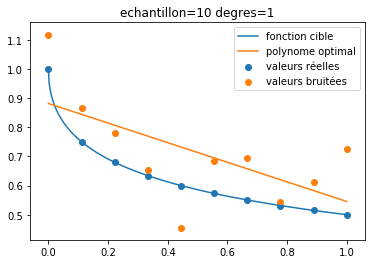

In [100]:
variation_degres(1)

Optimization terminated successfully.
0.06117661608769331


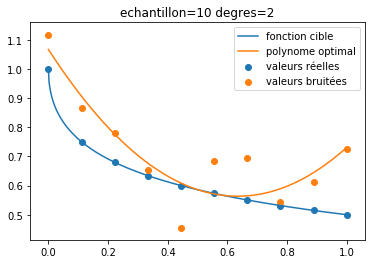

In [101]:
variation_degres(2)

Optimization terminated successfully.
0.052548695568525185


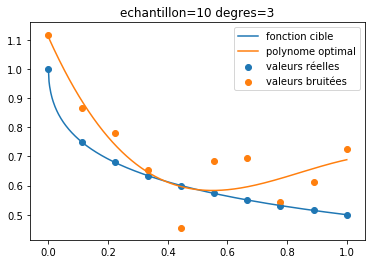

In [102]:
variation_degres(3)

Optimization terminated successfully.
0.03802007252756038


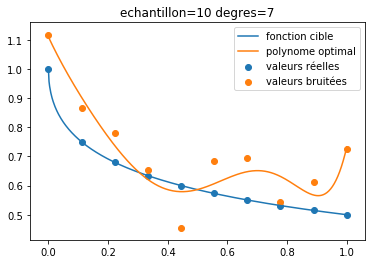

In [103]:
variation_degres(7)

Optimization terminated successfully.
0.008325674141360768


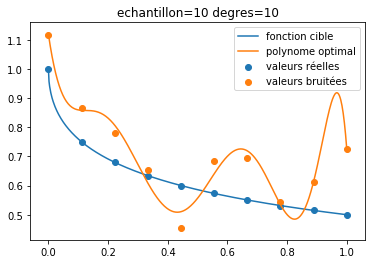

In [104]:
variation_degres(10)

Optimization terminated successfully.
0.00578976551286759


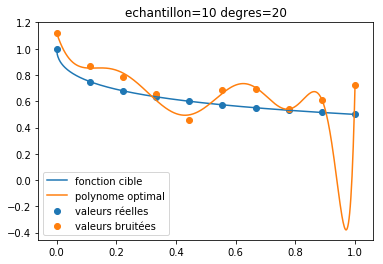

In [105]:
variation_degres(20)

Optimization terminated successfully.
0.0041322001179764575


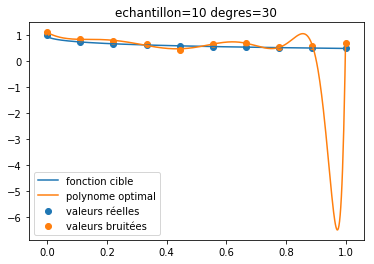

In [106]:
variation_degres(30)